In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Explorative Data Analysis

## Preprocessing

In [3]:
econt_data = pd.read_csv("/content/drive/MyDrive/IE517_project_data/MLF_GP2_EconCycle.csv")
econt_data.head()

,Date,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,1/31/1979,10.41,9.86,9.50,9.20,9.14,9.10,9.75,9.95,10.01,0.936599,0.955812,0.961575,47.08,0.011470,0.018060,0.024406
1,2/28/1979,10.24,9.72,9.29,9.13,9.11,9.10,9.74,9.90,9.96,0.951172,0.966797,0.972656,47.32,0.009298,0.014866,0.020612
2,3/31/1979,10.25,9.79,9.38,9.20,9.15,9.12,9.72,9.85,9.87,0.948293,0.960976,0.962927,47.39,0.010340,0.015455,0.020154
3,4/30/1979,10.12,9.78,9.43,9.25,9.21,9.18,9.86,9.95,9.98,0.974308,0.983202,0.986166,47.62,0.006720,0.013141,0.017409
4,5/31/1979,10.12,9.78,9.42,9.24,9.23,9.25,9.77,9.76,9.71,0.965415,0.964427,0.959486,47.76,0.005653,0.011451,0.016353


In [4]:
# Seperate Data
X = econt_data.drop(columns = ["Date","USPHCI","PCT 3MO FWD","PCT 6MO FWD","PCT 9MO FWD"])


In [5]:
print("Dataframe shape is:",econt_data.shape)

Dataframe shape is: (223, 17)


In [6]:
# Check whether there is null values
econt_data.isnull().sum().sum()

0

### Overview of Features

In [7]:
#Nature of Attributes:
columns_cat = econt_data.applymap(np.isreal).all()
print('\n')
print('Are the columns numerical or not? (True for numerical)')
print(columns_cat)



Are the columns numerical or not? (True for numerical)
Date           False
T1Y Index       True
T2Y Index       True
T3Y Index       True
T5Y Index       True
T7Y Index       True
T10Y Index      True
CP1M            True
CP3M            True
CP6M            True
CP1M_T1Y        True
CP3M_T1Y        True
CP6M_T1Y        True
USPHCI          True
PCT 3MO FWD     True
PCT 6MO FWD     True
PCT 9MO FWD     True
dtype: bool


In [8]:
econt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         223 non-null    object 
 1   T1Y Index    223 non-null    float64
 2   T2Y Index    223 non-null    float64
 3   T3Y Index    223 non-null    float64
 4   T5Y Index    223 non-null    float64
 5   T7Y Index    223 non-null    float64
 6   T10Y Index   223 non-null    float64
 7   CP1M         223 non-null    float64
 8   CP3M         223 non-null    float64
 9   CP6M         223 non-null    float64
 10  CP1M_T1Y     223 non-null    float64
 11  CP3M_T1Y     223 non-null    float64
 12  CP6M_T1Y     223 non-null    float64
 13  USPHCI       223 non-null    float64
 14  PCT 3MO FWD  223 non-null    float64
 15  PCT 6MO FWD  223 non-null    float64
 16  PCT 9MO FWD  223 non-null    float64
dtypes: float64(16), object(1)
memory usage: 29.7+ KB


### Correlation Matrix Heat Plot for Features


<AxesSubplot:>

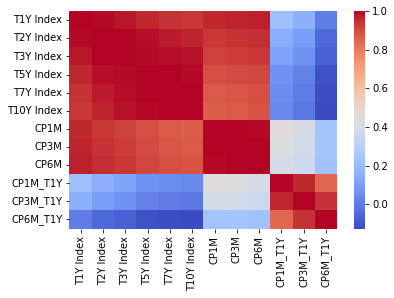

In [9]:
#:Coefficient&heatmap
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm')

### Boxplot for outliners


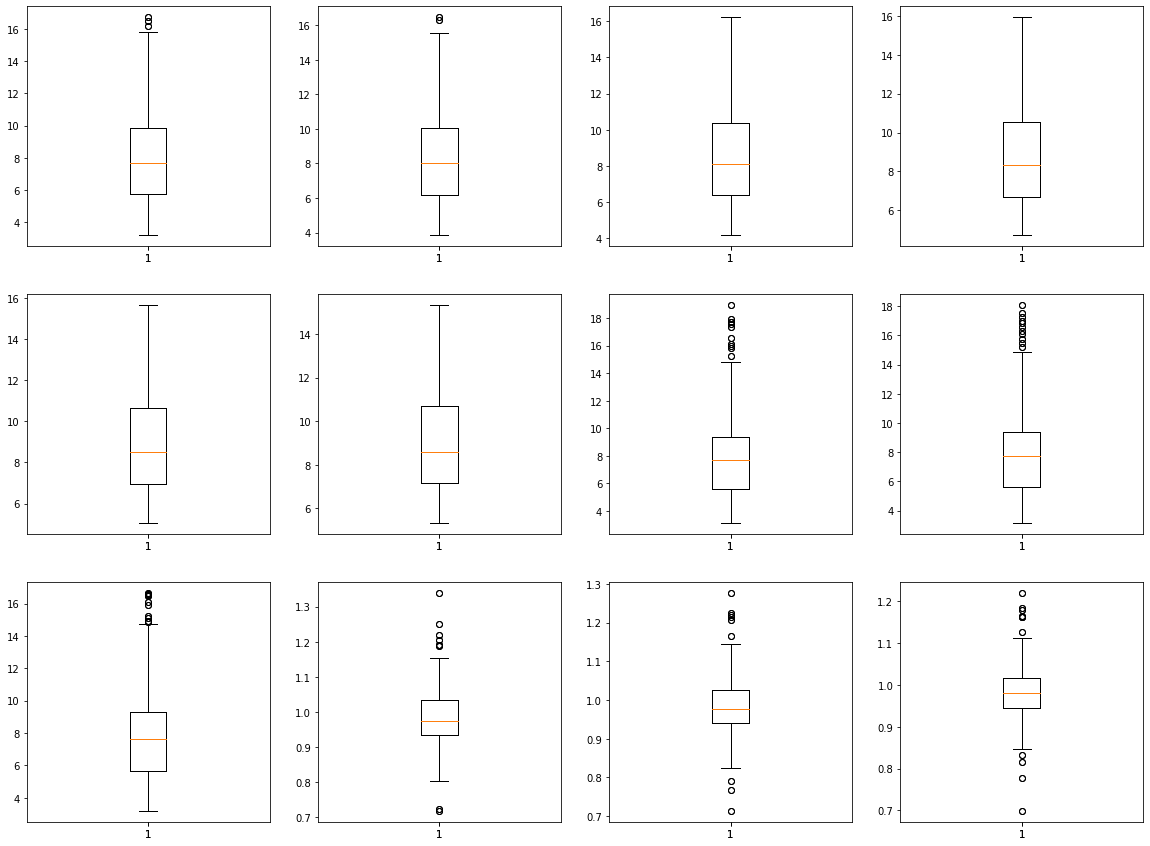

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for i, feature in enumerate(X):
  row = i // 4
  col = i % 4
  axes[row, col].boxplot(X[feature])
  axes[row, col].boxplot(X[feature])
plt.show()

# Data Preparation

##Functions

In [11]:
from scipy.stats.mstats import winsorize
def winsorize_outliers(X_train):
  pct_95 = np.percentile(X_train, 95, axis=0)

  # list of boolean
  outlier_cols = np.any(X_train > pct_95, axis=0).tolist()

  if np.any(outlier_cols):
    X_winsorized = X_train.copy()
    X_winsorized.loc[:, outlier_cols] = winsorize(X_train.loc[:, outlier_cols].values, limits=(0, 0.05))
    X_winsorized = pd.DataFrame(X_winsorized, columns=X_train.columns)
    return X_winsorized
  else:
    return X_train

In [12]:
from sklearn.decomposition import PCA
def pca_treatment(data):
    columns_pca = data[:, :9]
    columns_non_pca = data[:, 9:]
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(columns_pca)
    treated = np.concatenate((pca_result, columns_non_pca), axis=1)
    return treated

##Data Preparation: 3 month

In [13]:
from sklearn.model_selection import train_test_split
y_3m = econt_data["PCT 3MO FWD"]
#Train Test Split
X_3m_train, X_3m_test,y_3m_train,y_3m_test = train_test_split(X,y_3m,test_size=0.2,random_state = 1)
#Remove Outliners
X_of_3m_train = winsorize_outliers(X_3m_train)
X_of_3m_test = winsorize_outliers(X_3m_test)
#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale_3m_train = scaler.fit_transform(X_of_3m_train)
X_scale_3m_test = scaler.fit_transform(X_of_3m_test)
#PCA
X_3m_ready = pca_treatment(X_scale_3m_train)
X_3m_test2 = pca_treatment(X_scale_3m_test)



##Data Preparation: 6 month

In [14]:
y_6m = econt_data["PCT 6MO FWD"]

#Train Test Split
X_6m_train, X_6m_test,y_6m_train,y_6m_test = train_test_split(X,y_6m,test_size=0.2,random_state = 1)
#Remove Outliners
X_of_6m_train = winsorize_outliers(X_6m_train)
X_of_6m_test = winsorize_outliers(X_6m_test)
#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale_6m_train = scaler.fit_transform(X_of_6m_train)
X_scale_6m_test = scaler.fit_transform(X_of_6m_test)
#PCA
X_6m_ready = pca_treatment(X_scale_6m_train)
X_6m_test2 = pca_treatment(X_scale_6m_test)

##Data Preparation: 9 month

In [15]:
y_9m = econt_data["PCT 9MO FWD"]

#Train Test Split
X_9m_train, X_9m_test,y_9m_train,y_9m_test = train_test_split(X,y_9m,test_size=0.2,random_state = 1)
#Remove Outliners
X_of_9m_train = winsorize_outliers(X_9m_train)
X_of_9m_test = winsorize_outliers(X_9m_test)
#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale_9m_train = scaler.fit_transform(X_of_9m_train)
X_scale_9m_test = scaler.fit_transform(X_of_9m_test)
#PCA
X_9m_ready = pca_treatment(X_scale_9m_train)
X_9m_test2 = pca_treatment(X_scale_9m_test)

# Model Fitting and Hyperparameters Tuning

## Linear Regression (Baseline)

###3 Month

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

BLR_3m = LinearRegression()
scores_train = cross_val_score(BLR_3m, X_3m_train, y_3m_train, cv=10, scoring='neg_root_mean_squared_error')
print('Cross-validation scores:', -scores_train)
print('Average score:', -np.mean(scores_train))

Cross-validation scores: [0.00344916 0.00535078 0.00519096 0.0044903  0.00338128 0.00366967
 0.0041418  0.00414377 0.00606321 0.00478159]
Average score: 0.004466253155907661


###6 Month

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
BLR_6m = LinearRegression()
scores_train = cross_val_score(BLR_6m, X_6m_train, y_6m_train, cv=10, scoring='neg_root_mean_squared_error')
print('Cross-validation scores:', -scores_train)
print('Average score:', -np.mean(scores_train))

Cross-validation scores: [0.0062819  0.00937148 0.00880157 0.0063045  0.00543323 0.00652564
 0.00710406 0.00660089 0.0108108  0.01037724]
Average score: 0.007761129948970037


###9 Month

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
BLR_9m = LinearRegression()
scores_train = cross_val_score(BLR_9m, X_9m_train, y_9m_train, cv=10, scoring='neg_root_mean_squared_error')
print('Cross-validation scores:', -scores_train)
print('Average score:', -np.mean(scores_train))

Cross-validation scores: [0.00846543 0.01365863 0.01192851 0.00771538 0.00799519 0.00985763
 0.01025365 0.00814529 0.01392346 0.01516571]
Average score: 0.010710886514124393


## Linear Regression (Treated Data)

###3 Month

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR_3m = LinearRegression()
scores_train = cross_val_score(LR_3m, X_3m_ready, y_3m_train, cv=10, scoring='neg_root_mean_squared_error')
print('Cross-validation scores:', -scores_train)
print('Average score:', -np.mean(scores_train))

Cross-validation scores: [0.00301458 0.00557976 0.00563225 0.00520718 0.00323919 0.00392622
 0.00568301 0.00431576 0.00630541 0.00400297]
Average score: 0.0046906341037794615


###6 Month

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR_6m = LinearRegression()
scores_train = cross_val_score(LR_6m, X_6m_ready, y_6m_train, cv=10, scoring='neg_root_mean_squared_error')
print('Cross-validation scores:', -scores_train)
print('Average score:', -np.mean(scores_train))

Cross-validation scores: [0.00690516 0.00936329 0.00937021 0.00762411 0.00529375 0.00699814
 0.00892561 0.00777533 0.01118403 0.00826348]
Average score: 0.008170311473178796


###9 Month

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
LR_9m = LinearRegression()
scores_train = cross_val_score(LR_9m, X_9m_ready, y_9m_train, cv=10, scoring='neg_root_mean_squared_error')
print('Cross-validation scores:', -scores_train)
print('Average score:', -np.mean(scores_train))

Cross-validation scores: [0.00995196 0.01293406 0.01255701 0.0088426  0.00775857 0.00981013
 0.01222132 0.01032982 0.01457536 0.0121217 ]
Average score: 0.011110252015605362


## Lasso

###3 Month

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_3m = Lasso()
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_3m_ready)
# Perform grid search using cross-validation
grid_search = GridSearchCV(lasso_3m,param_grid,cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_poly, y_3m_train)
# Print result
print("Best alpha: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)


Best alpha:  {'alpha': 0.001}
Best score:  0.0041405952779563285


In [23]:
#Ridge was used, but not good
#from sklearn.linear_model import Ridge
# scores_train = cross_val_score(model, X_3m_ready, y_3m_train, cv=10, scoring='neg_root_mean_squared_error')
# print('Cross-validation scores:', -scores_train)
# print('Average score:', -np.mean(scores_train))
# model.fit(X_3m_ready, y_3m_train)
# y_pred_3m = model.predict(X_3m_test)
# scores_test_3m = r2_score(y_3m_test, y_pred_3m)
# print('Out of sample r^2 scores:', scores_test_3m)

###6 Month

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_6m = Lasso()
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_6m_ready)
# Perform grid search using cross-validation
grid_search = GridSearchCV(lasso_6m,param_grid,cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_poly, y_6m_train)
# Print result
print("Best alpha: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best alpha:  {'alpha': 0.001}
Best score:  0.007022075286912869


###9 Month

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_9m = Lasso()
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_9m_ready)
# Perform grid search using cross-validation
grid_search = GridSearchCV(lasso_9m,param_grid,cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_poly, y_9m_train)
# Print result
print("Best alpha: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best alpha:  {'alpha': 0.001}
Best score:  0.009624053595979567


## SVM

###3 Month

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
SVM_3m = SVR()
param_grid = {'kernel': ['linear', 'poly','sigmoid'],'degree': [2, 3, 4]}
grid_search = GridSearchCV(SVM_3m,param_grid,cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_3m_ready, y_3m_train)
# Print result
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best hyperparameters:  {'degree': 2, 'kernel': 'linear'}
Best score:  0.004848218645311797


###6 Month

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
SVM_6m = SVR()
param_grid = {'kernel': ['linear', 'poly','sigmoid'],'degree': [2, 3, 4]}
grid_search = GridSearchCV(SVM_6m,param_grid,cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_6m_ready, y_6m_train)
# Print result
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best hyperparameters:  {'degree': 2, 'kernel': 'linear'}
Best score:  0.008883908505888858


###9 Month

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
SVM_9m = SVR()
param_grid = {'kernel': ['linear', 'poly','sigmoid'],'degree': [2, 3, 4]}
grid_search = GridSearchCV(SVM_9m,param_grid,cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_9m_ready, y_9m_train)
# Print result
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best hyperparameters:  {'degree': 2, 'kernel': 'linear'}
Best score:  0.013058487446134606


## Random Forest

###3 Month

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

RF_3m = RandomForestRegressor()
param_grid = {'n_estimators': [100,200,300],'max_depth': [1,5,10]}
grid_search = GridSearchCV(RF_3m,param_grid,cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_3m_ready, y_3m_train)
# Print result
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best hyperparameters:  {'max_depth': 10, 'n_estimators': 200}
Best score:  0.003804592373128745


###6 Month

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

RF_6m = RandomForestRegressor()
param_grid = {'n_estimators': [100,200,300],'max_depth': [1,5,10]}
grid_search = GridSearchCV(RF_6m,param_grid,cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_6m_ready, y_6m_train)
# Print result
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best hyperparameters:  {'max_depth': 10, 'n_estimators': 100}
Best score:  0.00610242472284272


###9 Month

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

RF_9m = RandomForestRegressor()
param_grid = {'n_estimators': [100,200,300],'max_depth': [1,5,10]}
grid_search = GridSearchCV(RF_9m,param_grid,cv=10,scoring='neg_root_mean_squared_error')
grid_search.fit(X_9m_ready, y_9m_train)
# Print result
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best hyperparameters:  {'max_depth': 10, 'n_estimators': 200}
Best score:  0.00737813359468995


## Ensemble

###3 Month

In [32]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

SVM_3m = SVR(degree = 2, kernel = 'linear')
lasso_3m = Lasso(alpha=0.001)
RF_3m = RandomForestRegressor(max_depth = 10, n_estimators = 200)
ensemble_3m = VotingRegressor([('svm', SVM_3m), ('lasso', lasso_3m), ('rf', RF_3m)], n_jobs=-1)
cv_scores = cross_val_score(ensemble_3m, X_3m_ready, y_3m_train, cv=10, scoring='neg_root_mean_squared_error')
print("Mean RMSE: ", -cv_scores.mean())

Mean RMSE:  0.004188287119678128


###6 Month

In [33]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

SVM_6m = SVR(degree = 2, kernel = 'linear')
lasso_6m = Lasso(alpha=0.001)
RF_6m = RandomForestRegressor(max_depth = 10, n_estimators = 200)
ensemble_6m = VotingRegressor([('svm', SVM_6m), ('lasso', lasso_6m), ('rf', RF_6m)], n_jobs=-1)
cv_scores = cross_val_score(ensemble_6m, X_6m_ready, y_6m_train, cv=10, scoring='neg_root_mean_squared_error')
print("Mean RMSE: ", -cv_scores.mean())

Mean RMSE:  0.007280247030022555


###9 Month

In [34]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

SVM_9m = SVR(degree = 2, kernel = 'linear')
lasso_9m = Lasso(alpha=0.001)
RF_9m = RandomForestRegressor(max_depth = 10, n_estimators = 200)
ensemble_9m = VotingRegressor([('svm', SVM_9m), ('lasso', lasso_9m), ('rf', RF_9m)], n_jobs=-1)
cv_scores = cross_val_score(ensemble_9m, X_9m_ready, y_9m_train, cv=10, scoring='neg_root_mean_squared_error')
print("Mean RMSE: ", -cv_scores.mean())

Mean RMSE:  0.00969509644944266


# Testing

##  Baseline

In [35]:
from sklearn.metrics import make_scorer, mean_squared_error

def BLR_Testing(train_data_x,train_data_y,test_data_x,test_data_y):
    BLR = LinearRegression()
    BLR.fit(train_data_x,train_data_y)
    y_predict = BLR.predict(test_data_x)
    score = mean_squared_error(test_data_y, y_predict, squared=False)
    return score


In [36]:
s_BLR_3m = BLR_Testing(X_3m_train,y_3m_train,X_3m_test,y_3m_test)
s_BLR_6m = BLR_Testing(X_6m_train,y_6m_train,X_6m_test,y_6m_test)
s_BLR_9m = BLR_Testing(X_9m_train,y_9m_train,X_9m_test,y_9m_test)
print("Testing accuracy of baseline model for 3 month prediction:",s_BLR_3m)
print("Testing accuracy of baseline model for 6 month prediction:",s_BLR_6m)
print("Testing accuracy of baseline model for 9 month prediction:",s_BLR_9m)

Testing accuracy of baseline model for 3 month prediction: 0.005066539124267962
Testing accuracy of baseline model for 6 month prediction: 0.00999036408336882
Testing accuracy of baseline model for 9 month prediction: 0.01243814119253665


##  Linear Regression

In [37]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def LR_Testing(train_data_x,train_data_y,test_data_x,test_data_y):
    LR = LinearRegression()
    LR.fit(train_data_x,train_data_y)
    y_predict = LR.predict(test_data_x)
    score = mean_squared_error(test_data_y, y_predict, squared=False)
    return score

In [38]:
s_LR_3m = LR_Testing(X_3m_ready,y_3m_train,X_3m_test2,y_3m_test)
s_LR_6m = LR_Testing(X_6m_ready,y_6m_train,X_6m_test2,y_6m_test)
s_LR_9m = LR_Testing(X_9m_ready,y_9m_train,X_9m_test2,y_9m_test)
print("Testing accuracy of linear regression with treated data for 3 month prediction:",s_LR_3m)
print("Testing accuracy of linear regression with treated data for 6 month prediction:",s_LR_6m)
print("Testing accuracy of linear regression with treated data for 9 month prediction:",s_LR_9m)

Testing accuracy of linear regression with treated data for 3 month prediction: 0.004407943974515175
Testing accuracy of linear regression with treated data for 6 month prediction: 0.009013973095632467
Testing accuracy of linear regression with treated data for 9 month prediction: 0.012924290080752075


##  Lasso

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_squared_error

def LASSO_Testing(train_data_x,train_data_y,test_data_x,test_data_y):
  lasso = Lasso(alpha = 0.001)
  lasso.fit(train_data_x,train_data_y)
  y_predict = lasso.predict(test_data_x)
  score = mean_squared_error(test_data_y, y_predict, squared=False)
  return score


In [40]:
s_Lasso_3m = LASSO_Testing(X_3m_ready,y_3m_train,X_3m_test2,y_3m_test)
s_Lasso_6m = LASSO_Testing(X_6m_ready,y_6m_train,X_6m_test2,y_6m_test)
s_Lasso_9m = LASSO_Testing(X_9m_ready,y_9m_train,X_9m_test2,y_9m_test)
print("Testing accuracy of Lasso with treated data for 3 month prediction:",s_Lasso_3m)
print("Testing accuracy of Lasso with treated data for 6 month prediction:",s_Lasso_6m)
print("Testing accuracy of Lasso with treated data for 9 month prediction:",s_Lasso_9m)

Testing accuracy of Lasso with treated data for 3 month prediction: 0.004457512112370138
Testing accuracy of Lasso with treated data for 6 month prediction: 0.008794893747627113
Testing accuracy of Lasso with treated data for 9 month prediction: 0.011767514831428974


##  SVM

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error
def SVM_Testing(train_data_x,train_data_y,test_data_x,test_data_y):
  SVM = SVR(kernel='linear',degree = 2)
  SVM.fit(train_data_x,train_data_y)
  y_predict = SVM.predict(test_data_x)
  score = mean_squared_error(test_data_y, y_predict, squared=False)
  return score

In [42]:
s_SVM_3m = SVM_Testing(X_3m_ready,y_3m_train,X_3m_test2,y_3m_test)
s_SVM_6m = SVM_Testing(X_6m_ready,y_6m_train,X_6m_test2,y_6m_test)
s_SVM_9m = SVM_Testing(X_9m_ready,y_9m_train,X_9m_test2,y_9m_test)
print("Testing accuracy of SVM with treated data for 3 month prediction:",s_SVM_3m)
print("Testing accuracy of SVM with treated data for 6 month prediction:",s_SVM_6m)
print("Testing accuracy of SVM with treated data for 9 month prediction:",s_SVM_9m)

Testing accuracy of SVM with treated data for 3 month prediction: 0.004893851920596717
Testing accuracy of SVM with treated data for 6 month prediction: 0.010196197143559892
Testing accuracy of SVM with treated data for 9 month prediction: 0.013653215008652833


##  Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
def RF_Testing(train_data_x,train_data_y,test_data_x,test_data_y):
  RF = RandomForestRegressor(n_estimators = 300, max_depth = 10)
  RF.fit(train_data_x,train_data_y)
  y_predict = RF.predict(test_data_x)
  score = mean_squared_error(test_data_y, y_predict, squared=False)
  return score

In [44]:
s_RF_3m = RF_Testing(X_3m_ready,y_3m_train,X_3m_test2,y_3m_test)
s_RF_6m = RF_Testing(X_6m_ready,y_6m_train,X_6m_test2,y_6m_test)
s_RF_9m = RF_Testing(X_9m_ready,y_9m_train,X_9m_test2,y_9m_test)
print("Testing accuracy of Random Forest with treated data for 3 month prediction:",s_RF_3m)
print("Testing accuracy of Random Forest with treated data for 6 month prediction:",s_RF_6m)
print("Testing accuracy of Random Forest with treated data for 9 month prediction:",s_RF_9m)

Testing accuracy of Random Forest with treated data for 3 month prediction: 0.004735195174034446
Testing accuracy of Random Forest with treated data for 6 month prediction: 0.009665559290584354
Testing accuracy of Random Forest with treated data for 9 month prediction: 0.01478260198166765


##  Ensemble

In [45]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
def En_Testing(train_data_x,train_data_y,test_data_x,test_data_y):
  SVM_t = SVR(degree = 2, kernel = 'linear')
  lasso_t = Lasso(alpha=0.001)
  RF_t = RandomForestRegressor(max_depth = 10, n_estimators = 200)
  ensemble = VotingRegressor([('svm', SVM_t), ('lasso', lasso_t), ('rf', RF_t)], n_jobs=-1)
  ensemble.fit(train_data_x,train_data_y)
  y_predict = ensemble.predict(test_data_x)
  score = mean_squared_error(test_data_y, y_predict, squared=False)
  return score

In [46]:
s_En_3m = En_Testing(X_3m_ready,y_3m_train,X_3m_test2,y_3m_test)
s_En_6m = En_Testing(X_6m_ready,y_6m_train,X_6m_test2,y_6m_test)
s_En_9m = En_Testing(X_9m_ready,y_9m_train,X_9m_test2,y_9m_test)
print("Testing accuracy of Ensemble with treated data for 3 month prediction:",s_En_3m)
print("Testing accuracy of Ensemble with treated data for 6 month prediction:",s_En_6m)
print("Testing accuracy of Ensemble with treated data for 9 month prediction:",s_En_9m)

Testing accuracy of Ensemble with treated data for 3 month prediction: 0.004588002795736894
Testing accuracy of Ensemble with treated data for 6 month prediction: 0.009132829338926481
Testing accuracy of Ensemble with treated data for 9 month prediction: 0.012751374348459634


# Conclusion

See Reports for details